In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
# smaller sample for development
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:1000], y_test[:1000]

In [41]:
x_train.shape, y_train.shape

((5000, 28, 28), (5000,))

In [42]:
x_test.shape, y_test.shape

((1000, 28, 28), (1000,))

In [43]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [44]:
y_train.shape, y_test.shape

((5000, 10), (1000, 10))

In [87]:
def display_batch(x, y):
    fig, axes = plt.subplots(2, 8, figsize=(12, 3))
    axes = axes.reshape(16)
    for axis in axes:
        axis.set_axis_off()
        
    for image, label, axis in zip(x[:16], y[:16], axes):
        axis.imshow(image, cmap='gray')
        axis.set_title(label.argmax())

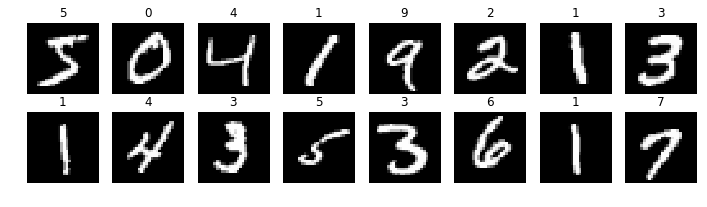

In [88]:
display_batch(x_train, y_train)

In [45]:
from keras.layers import *
from keras.models import Sequential

In [ ]:
from IPython.display import display

def evaluate(layers):
    model = Sequential(layers)
    model.compile(
        optimizer='nadam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    display(model.summary())
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

    labels = y_test.argmax()
    predictions = model.predict(x_test)
    predicted_labels = predictions.argmax()
    prediction_certainty = predictions.max(axis=1)
    
    y_test
    
    correct = np.where(predicted_labels == labels)
    
    
    
    return model

In [66]:
model_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10),
])
model_1.compile(
    optimizer='nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 0s - loss: 10.0248 - acc: 0.1568 - val_loss: 10.5533 - val_acc: 0.2190
Epoch 2/10
5000/5000 [==============================] - 0s - loss: 9.8824 - acc: 0.1776 - val_loss: 10.2982 - val_acc: 0.2060
Epoch 3/10
5000/5000 [==============================] - 0s - loss: 9.1893 - acc: 0.1896 - val_loss: 9.6653 - val_acc: 0.2020
Epoch 4/10
5000/5000 [==============================] - 0s - loss: 9.4102 - acc: 0.1492 - val_loss: 10.1484 - val_acc: 0.1130
Epoch 5/10
5000/5000 [==============================] - 0s - loss: 10.0370 - acc: 0.1182 - val_loss: 10.4179 - val_acc: 0.1240
Epoch 6/10
5000/5000 [==============================] - 0s - loss: 10.2145 - acc: 0.1126 - val_loss: 10.6409 - val_acc: 0.1210
Epoch 7/10
5000/5000 [==============================] - 0s - loss: 10.0085 - acc: 0.1134 - val_loss: 8.4545 - val_acc: 0.1270
Epoch 8/10
5000/5000 [==============================] - 0s - loss: 9

In [68]:
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax'),
])
model_2.compile(
    optimizer='nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 0s - loss: 10.2122 - acc: 0.3584 - val_loss: 9.0066 - val_acc: 0.4330
Epoch 2/10
5000/5000 [==============================] - 0s - loss: 8.3889 - acc: 0.4754 - val_loss: 8.3356 - val_acc: 0.4770
Epoch 3/10
5000/5000 [==============================] - 0s - loss: 8.0207 - acc: 0.4980 - val_loss: 7.8889 - val_acc: 0.5050
Epoch 4/10
5000/5000 [==============================] - 0s - loss: 7.6087 - acc: 0.5250 - val_loss: 7.7200 - val_acc: 0.5170
Epoch 5/10
5000/5000 [==============================] - 0s - loss: 7.5888 - acc: 0.5264 - val_loss: 7.6265 - val_acc: 0.5230
Epoch 6/10
5000/5000 [==============================] - 0s - loss: 7.3556 - acc: 0.5408 - val_loss: 7.5394 - val_acc: 0.5300
Epoch 7/10
5000/5000 [==============================] - 0s - loss: 7.2724 - acc: 0.5464 - val_loss: 7.1333 - val_acc: 0.5560
Epoch 8/10
5000/5000 [==============================] - 0s - loss: 7.1782 - 

In [70]:
model_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    BatchNormalization(),
    Dense(10, activation='softmax'),
])
model_3.compile(
    optimizer='nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [71]:
model_3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 0s - loss: 0.7377 - acc: 0.7766 - val_loss: 0.5066 - val_acc: 0.8550
Epoch 2/10
5000/5000 [==============================] - 0s - loss: 0.3547 - acc: 0.8990 - val_loss: 0.4708 - val_acc: 0.8710
Epoch 3/10
5000/5000 [==============================] - 0s - loss: 0.2993 - acc: 0.9156 - val_loss: 0.4910 - val_acc: 0.8750
Epoch 4/10
5000/5000 [==============================] - 0s - loss: 0.2721 - acc: 0.9260 - val_loss: 0.4950 - val_acc: 0.8790
Epoch 5/10
5000/5000 [==============================] - 0s - loss: 0.2437 - acc: 0.9258 - val_loss: 0.5027 - val_acc: 0.8770
Epoch 6/10
5000/5000 [==============================] - 0s - loss: 0.2272 - acc: 0.9344 - val_loss: 0.5145 - val_acc: 0.8790
Epoch 7/10
5000/5000 [==============================] - 0s - loss: 0.2186 - acc: 0.9344 - val_loss: 0.5266 - val_acc: 0.8770
Epoch 8/10
5000/5000 [==============================] - 0s - loss: 0.2042 - a

In [56]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile(
    optimizer='nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [58]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 0s - loss: 9.4750 - acc: 0.4116 - val_loss: 9.6225 - val_acc: 0.4030
Epoch 2/10
5000/5000 [==============================] - 0s - loss: 9.4101 - acc: 0.4160 - val_loss: 9.5882 - val_acc: 0.4050
Epoch 3/10
5000/5000 [==============================] - 0s - loss: 9.4227 - acc: 0.4152 - val_loss: 9.3146 - val_acc: 0.4200
Epoch 4/10
5000/5000 [==============================] - 0s - loss: 9.2450 - acc: 0.4256 - val_loss: 8.6248 - val_acc: 0.4640
Epoch 5/10
5000/5000 [==============================] - 0s - loss: 8.8674 - acc: 0.4496 - val_loss: 8.5526 - val_acc: 0.4690
Epoch 6/10
5000/5000 [==============================] - 0s - loss: 9.1526 - acc: 0.4318 - val_loss: 9.0128 - val_acc: 0.4390
Epoch 7/10
5000/5000 [==============================] - 0s - loss: 8.9683 - acc: 0.4432 - val_loss: 8.7854 - val_acc: 0.4540
Epoch 8/10
5000/5000 [==============================] - 0s - loss: 8.7694 - a